In [1]:
print('SS')

SS


Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([20, 25, 30, 40, 45])


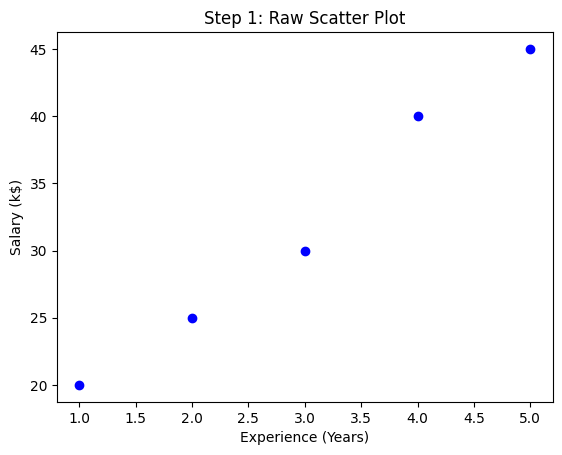

In [6]:
# visuallize data

plt.scatter(X, y, color='blue')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (k$)')
plt.title('Step 1: Raw Scatter Plot')
plt.show()

Step 2:

Find mean of x and y

In [10]:
x_mean = np.mean(X)
y_mean = np.mean(y)

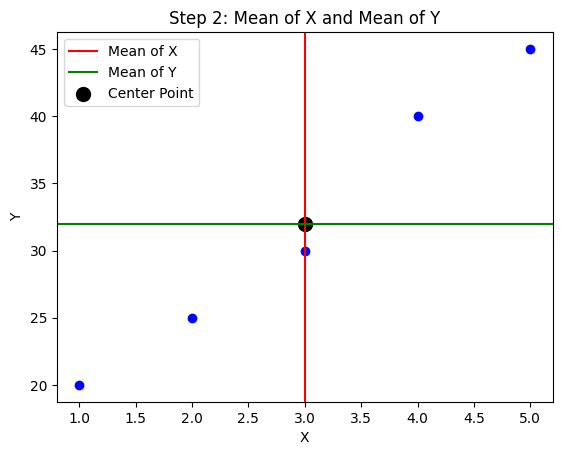

Mean of X: 3.0
Mean of Y: 32.0


In [15]:
# connect mean of x and mean of y

plt.scatter(X, y, color='blue')
plt.axvline(x_mean, color='red', label='Mean of X')
plt.axhline(y_mean, color='green', label='Mean of Y')
plt.scatter(x_mean, y_mean, color='black', s=100, label='Center Point')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Step 2: Mean of X and Mean of Y')
plt.legend()
plt.show()

print("Mean of X:", x_mean)
print("Mean of Y:", y_mean)

Step 3:



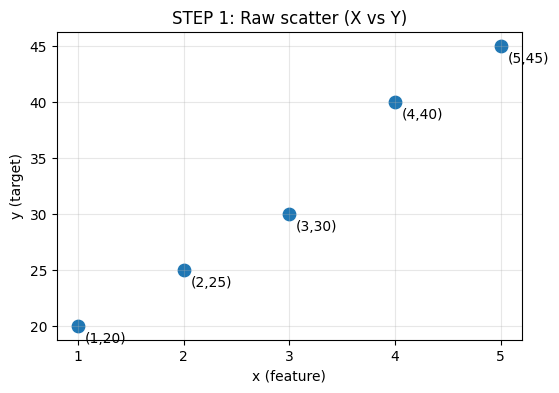

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5], dtype=float)
y = np.array([20,25,30,40,45], dtype=float)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=80)
plt.title("STEP 1: Raw scatter (X vs Y)")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.grid(alpha=0.3)
plt.xticks(x)
for xi, yi in zip(x, y):
    plt.annotate(f"({int(xi)},{int(yi)})", (xi, yi), textcoords="offset points", xytext=(5,-12))
plt.show()


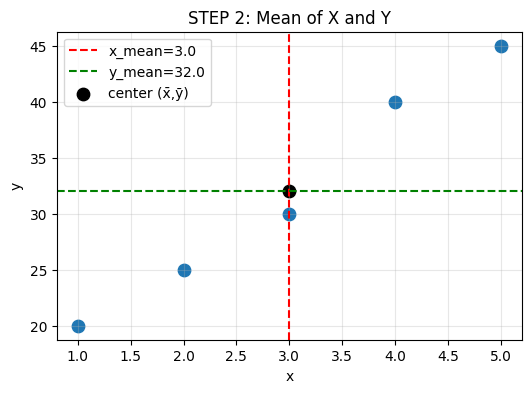

In [2]:
x_mean = x.mean()
y_mean = y.mean()

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=80)
plt.axvline(x_mean, color='red', linestyle='--', label=f'x_mean={x_mean}')
plt.axhline(y_mean, color='green', linestyle='--', label=f'y_mean={y_mean}')
plt.scatter([x_mean],[y_mean], color='black', s=80, label='center (x̄,ȳ)')
plt.title("STEP 2: Mean of X and Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


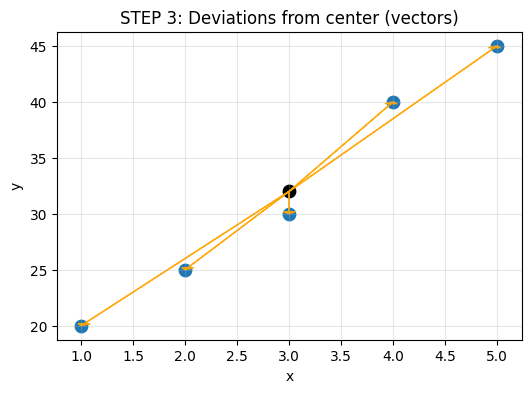

x deviations: [-2. -1.  0.  1.  2.]
y deviations: [-12.  -7.  -2.   8.  13.]


In [3]:
x_dev = x - x_mean
y_dev = y - y_mean

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=80)
plt.scatter([x_mean],[y_mean], color='black', s=80)
for xi, yi, xd, yd in zip(x, y, x_dev, y_dev):
    plt.arrow(x_mean, y_mean, xd, yd, head_width=0.12, length_includes_head=True, color='orange', alpha=0.9)
plt.title("STEP 3: Deviations from center (vectors)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()

print("x deviations:", x_dev)
print("y deviations:", y_dev)


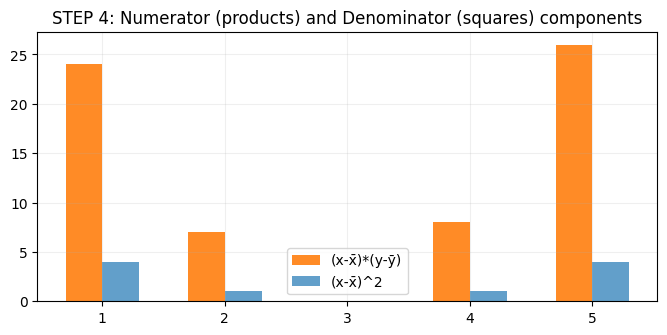

Products: [24.  7. -0.  8. 26.]
Squares: [4. 1. 0. 1. 4.]
Numerator sum = 65.0
Denominator sum = 10.0


In [4]:
products = (x - x_mean)*(y - y_mean)    # numerator pieces
squares = (x - x_mean)**2               # denominator pieces

plt.figure(figsize=(8,3.5))
plt.bar(x-0.15, products, width=0.3, color='tab:orange', alpha=0.9, label='(x-x̄)*(y-ȳ)')
plt.bar(x+0.15, squares,  width=0.3, color='tab:blue',   alpha=0.7, label='(x-x̄)^2')
plt.axhline(0, color='black', linewidth=0.6)
plt.xticks(x)
plt.title("STEP 4: Numerator (products) and Denominator (squares) components")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

print("Products:", products)
print("Squares:", squares)
print("Numerator sum =", products.sum())
print("Denominator sum =", squares.sum())


m (slope) = 6.5
c (intercept) = 12.5


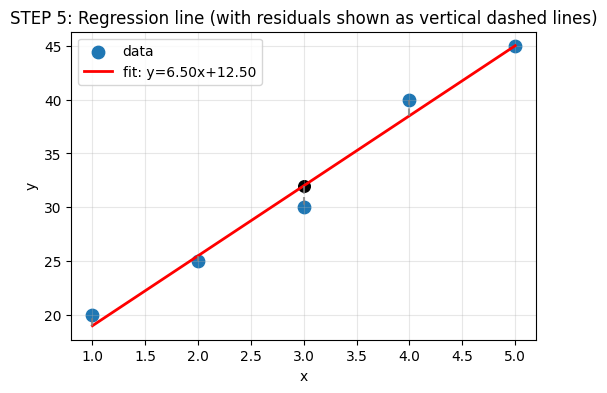

In [5]:
m = products.sum() / squares.sum()
c = y_mean - m * x_mean
y_pred = m*x + c

print("m (slope) =", m)
print("c (intercept) =", c)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=80, label='data')
plt.plot(x, y_pred, color='red', linewidth=2, label=f'fit: y={m:.2f}x+{c:.2f}')
plt.scatter([x_mean],[y_mean], color='black', s=70)
# vertical residual lines
for xi, yi, ypi in zip(x, y, y_pred):
    plt.vlines(xi, ypi, yi, color='gray', linestyle='--', alpha=0.8)
plt.title("STEP 5: Regression line (with residuals shown as vertical dashed lines)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Predictions ŷ: [19.  25.5 32.  38.5 45. ]
Residuals (y - ŷ): [ 1.  -0.5 -2.   1.5  0. ]
SSE=7.5000, MSE=1.5000, RMSE=1.2247, MAE=1.0000, R²=0.982558


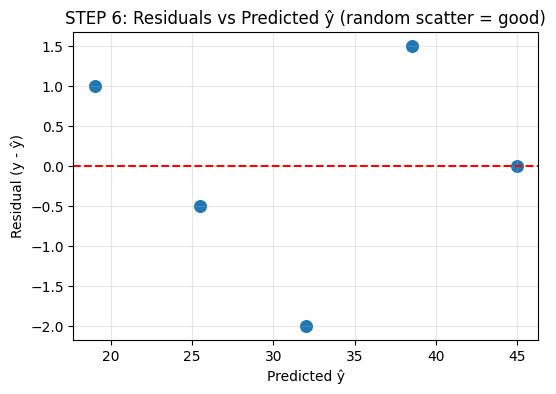

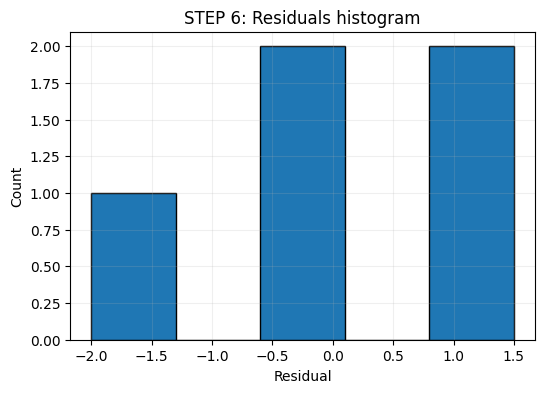

In [8]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = m*x + c
residuals = y - y_pred

SSE = (residuals**2).sum()
MSE = SSE / len(x)
RMSE = sqrt(MSE)
MAE = mean_absolute_error(y, y_pred)
R2 = 1 - SSE / ((y - y.mean())**2).sum()

print("Predictions ŷ:", y_pred)
print("Residuals (y - ŷ):", residuals)
print(f"SSE={SSE:.4f}, MSE={MSE:.4f}, RMSE={RMSE:.4f}, MAE={MAE:.4f}, R²={R2:.6f}")

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, s=70)
plt.axhline(0, color='red', linestyle='--')
plt.title("STEP 6: Residuals vs Predicted ŷ (random scatter = good)")
plt.xlabel("Predicted ŷ")
plt.ylabel("Residual (y - ŷ)")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=5, edgecolor='k')
plt.title("STEP 6: Residuals histogram")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.grid(alpha=0.2)
plt.show()
